In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
import os
import random
from IPython.display import display
from matplotlib import image

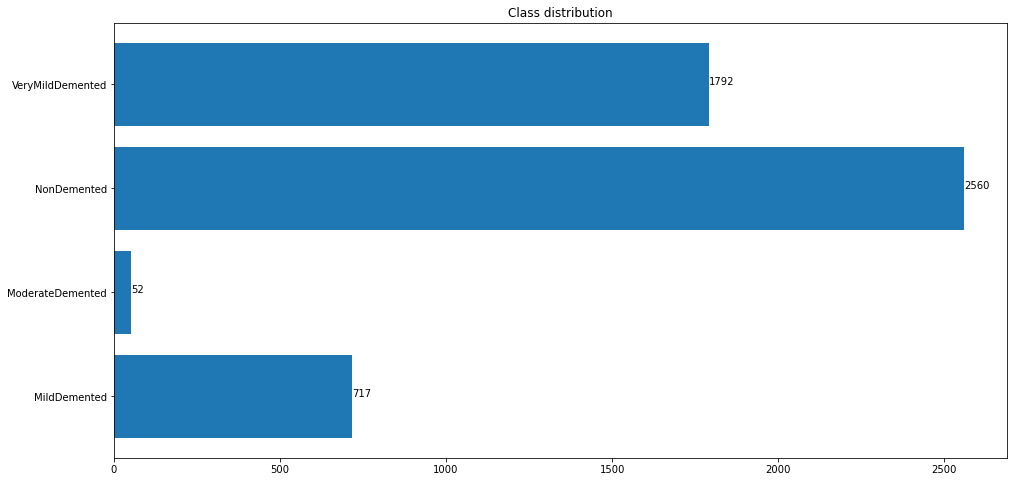

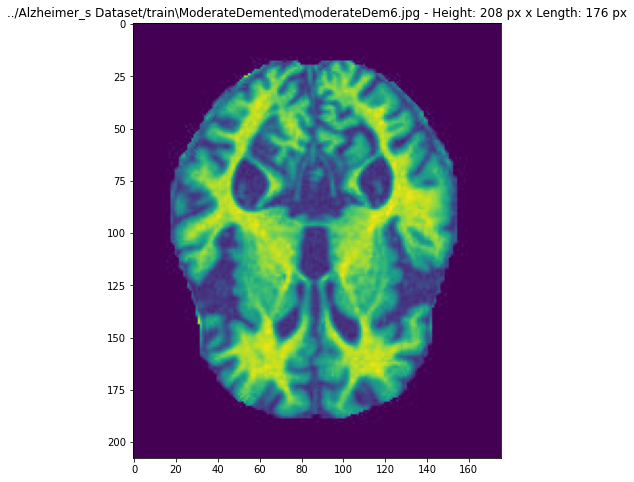

In [62]:
def data_analysis_histogram(dir_path):
    classes = os.listdir(dir_path)
    class_dist = []
    for c in classes:
        class_path = os.path.join(dir_path,c)
        class_dist.append(len(os.listdir(class_path)))
    plt.figure(figsize=(16, 8))
    plt.title("Class distribution")
    plt.barh(classes, class_dist)
    for index, value in enumerate(class_dist):
        plt.text(value, index,str(value))
    plt.show()

def data_analysis_image_size(dir_path, seed):
    classes = os.listdir(dir_path)
    if seed>=0:
        random.seed(seed)
    random_class_path = os.path.join(dir_path,random.choice(classes))
    random_img_name = random.choice(os.listdir(random_class_path))
    random_img_path = os.path.join(random_class_path,random_img_name)
    img = image.imread(random_img_path)
    plt.figure(figsize=(16, 8))
    plt.title("%s - Height: %d px x Length: %d px" % (random_img_path,img.shape[0],img.shape[1]))
    plt.imshow(img)

def data_analysis(dir_path, seed = -1):
    data_analysis_histogram(dir_path)
    data_analysis_image_size(dir_path, seed)
    

data_analysis('../Alzheimer_s Dataset/train')


In [35]:
def load_images(dir_path, seed = 42):
    random.seed(seed)
    classes = os.listdir(dir_path)
    for c in classes:
        class_path = os.path.join(dir_path,c)
        imgs_name = os.listdir(class_path)
        img_path_and_class = []
        for i in imgs_name:
            img_path_and_class.append([image.imread(os.path.join(class_path,i)),c])
    
    random.shuffle(img_path_and_class)
    img_path_and_class = np.array(img_path_and_class,dtype=object)
    return img_path_and_class[:,0], img_path_and_class[:,1]

In [177]:
xTrainVal, yTrainVal = load_images('../Alzheimer_s Dataset/train')
#xTest, yTest = load_images('../Alzheimer_s Dataset/test')